# Clustering(Hierarchical, Kmeans & DBSCAN) for the Airlines data

# Hierarchical Clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airlines = pd.read_excel("C:/Users/User/EastWestAirlines.xlsx",1)

In [3]:
airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(airlines.iloc[:,1:])

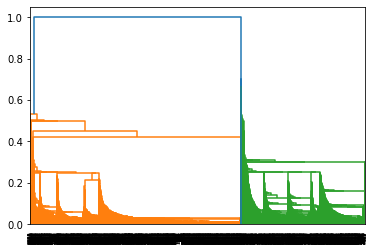

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [8]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [9]:
df_norm['h_clusterid'] = hc.labels_

# K-Means

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [11]:
airlines = pd.read_excel("C:/Users/User/EastWestAirlines.xlsx",1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airlines_df = scaler.fit_transform(airlines.iloc[:,1:])

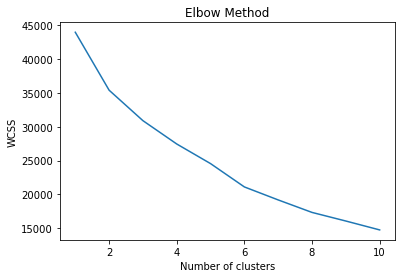

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_airlines_df)

KMeans(n_clusters=4, random_state=42)

In [15]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [16]:
airlines['clusterid_new'] = clusters_new.labels_

In [17]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [18]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# DB Scan

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
airlines = pd.read_excel("C:/Users/User/EastWestAirlines.xlsx",1)

In [21]:
print(airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [22]:
array=airlines.values

In [23]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [24]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [25]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [27]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [29]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [30]:
pd.concat([airlines,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
